In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Описание датасета**

Для лабораторной работы был выбран датасет индекса счастья населения в разных странах. Изначально датасет состоял из 5 различных файлов, данные были распределены по годам. Для удобства выполнения лабораторной работы все файлы были объединены. Датасет содержит 155 стран, для каждой из которых указаны индекс счастья и рейтинг в период с 2015 по 2019 год.


# **Исследование датасета**

Импортируем датасет, удалим пустые ячейки и выведем таблицу данных.

In [ ]:
import pandas as pd
import numpy as np

filename = '/content/drive/My Drive/МГТУ/6 семестр/ТМО/lab01/HD.csv'
ds = pd.read_csv(filename)
ds = ds.dropna()
# ds.head(50)
pd.set_option('max_rows', 10)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
ds.columns = ['Страна', 'Регион', 'Рейтинг 2015', 'Индекс 2015',  
                                  'Рейтинг 2016','Индекс 2016',
                                  'Рейтинг 2017','Индекс 2017',
                                  'Рейтинг 2018','Индекс 2018',
                                  'Рейтинг 2019','Индекс 2019',]
ds = pd.DataFrame(ds)
display(ds)

,Страна,Регион,Рейтинг 2015,Индекс 2015,Рейтинг 2016,Индекс 2016,Рейтинг 2017,Индекс 2017,Рейтинг 2018,Индекс 2018,Рейтинг 2019,Индекс 2019
0,Afghanistan,Southern Asia,153.00,3.58,154.00,3.36,141.00,3.79,145.00,3.63,154.00,3.20
1,Albania,Central and Eastern Europe,95.00,4.96,109.00,4.66,109.00,4.64,112.00,4.59,107.00,4.72
2,Algeria,Middle East and Northern Africa,68.00,5.61,38.00,6.36,53.00,5.87,84.00,5.29,88.00,5.21
3,Angola,Sub-Saharan Africa,137.00,4.03,141.00,3.87,140.00,3.80,142.00,3.79,47.00,6.09
4,Argentina,Latin America and Caribbean,30.00,6.57,26.00,6.65,24.00,6.60,29.00,6.39,116.00,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...
150,United States,North America,15.00,7.12,29.00,6.54,82.00,5.25,44.00,6.10,41.00,6.17
151,Uruguay,Latin America and Caribbean,32.00,6.49,49.00,5.99,4.19,5.07,102.00,4.81,108.00,4.71
152,Uzbekistan,Central and Eastern Europe,44.00,6.00,44.00,6.08,146.00,3.59,95.00,5.10,94.00,5.17
153,Venezuela,Latin America and Caribbean,23.00,6.81,96.00,5.06,116.00,4.51,152.00,3.35,151.00,3.38


# **Визуальное исследование**

# Диаграмма рассеяния

<AxesSubplot:xlabel='Индекс 2019', ylabel='Индекс 2015'>

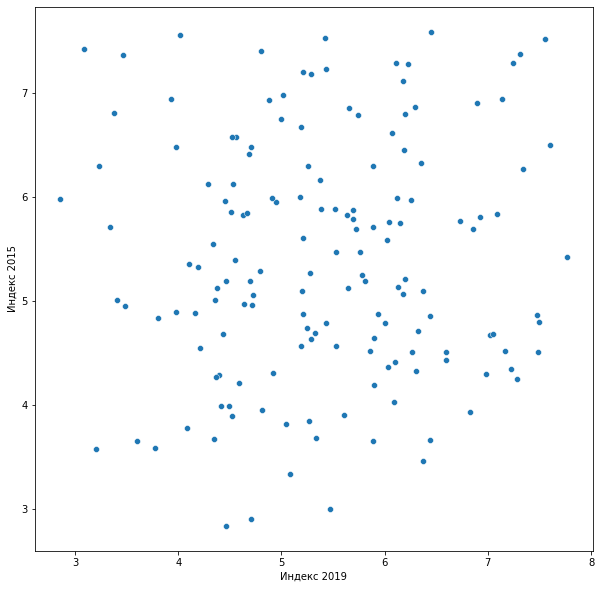

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10)) 
ds_new = ds
sns.scatterplot(ax=ax, y='Индекс 2015', x='Индекс 2019', data=ds_new)

Оценим влияние целевого признака на зависимость.

<AxesSubplot:xlabel='Индекс 2015', ylabel='Индекс 2019'>

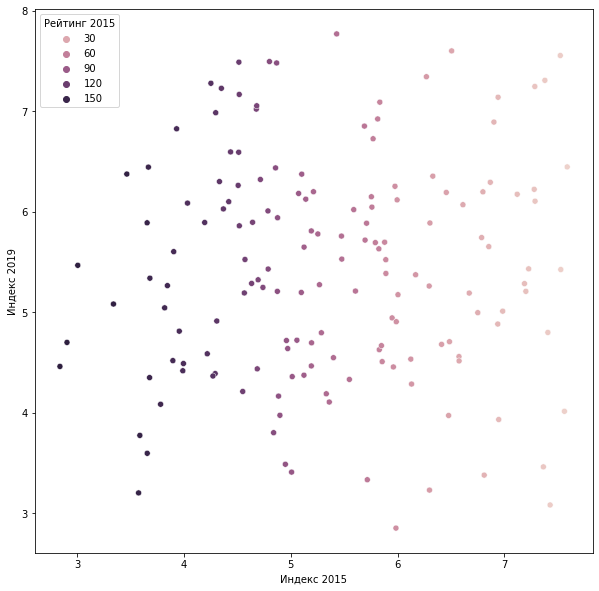

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Индекс 2015', y='Индекс 2019', data=ds, hue='Рейтинг 2015')

# **Гистограмма**

Построим гистограмму для оценки плотности вероятности распределения данных.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Индекс 2019', ylabel='Density'>

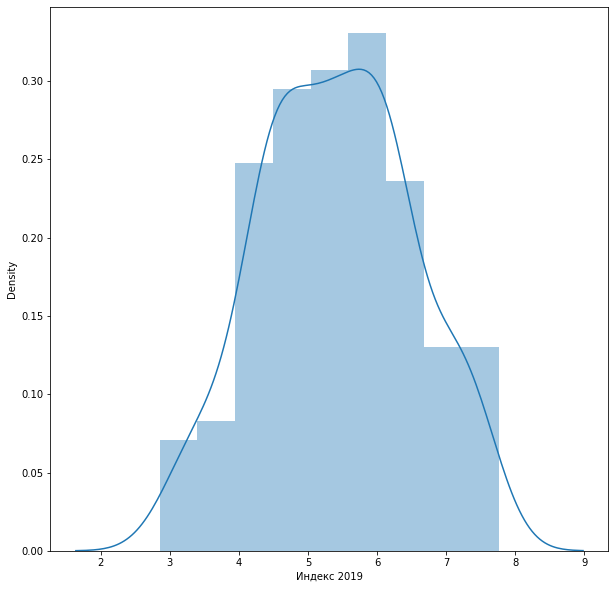

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(ds['Индекс 2019'])

# **Jointplot**

Jointplot - комбинации гистограммы и диаграммы рассеяния.

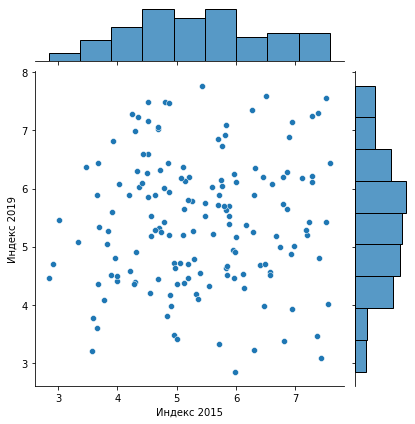

In [ ]:
sns.jointplot(x='Индекс 2015', y='Индекс 2019', data=ds)

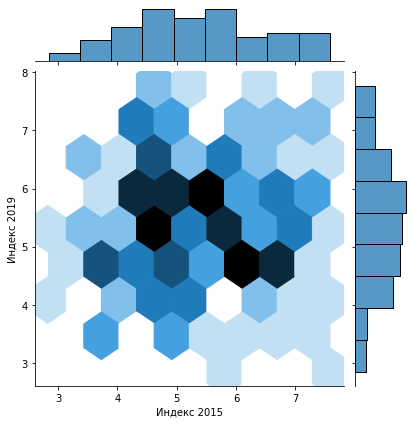

In [ ]:
sns.jointplot(x='Индекс 2015', y='Индекс 2019', data=ds, kind="hex")

# **Парные диаграммы**

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

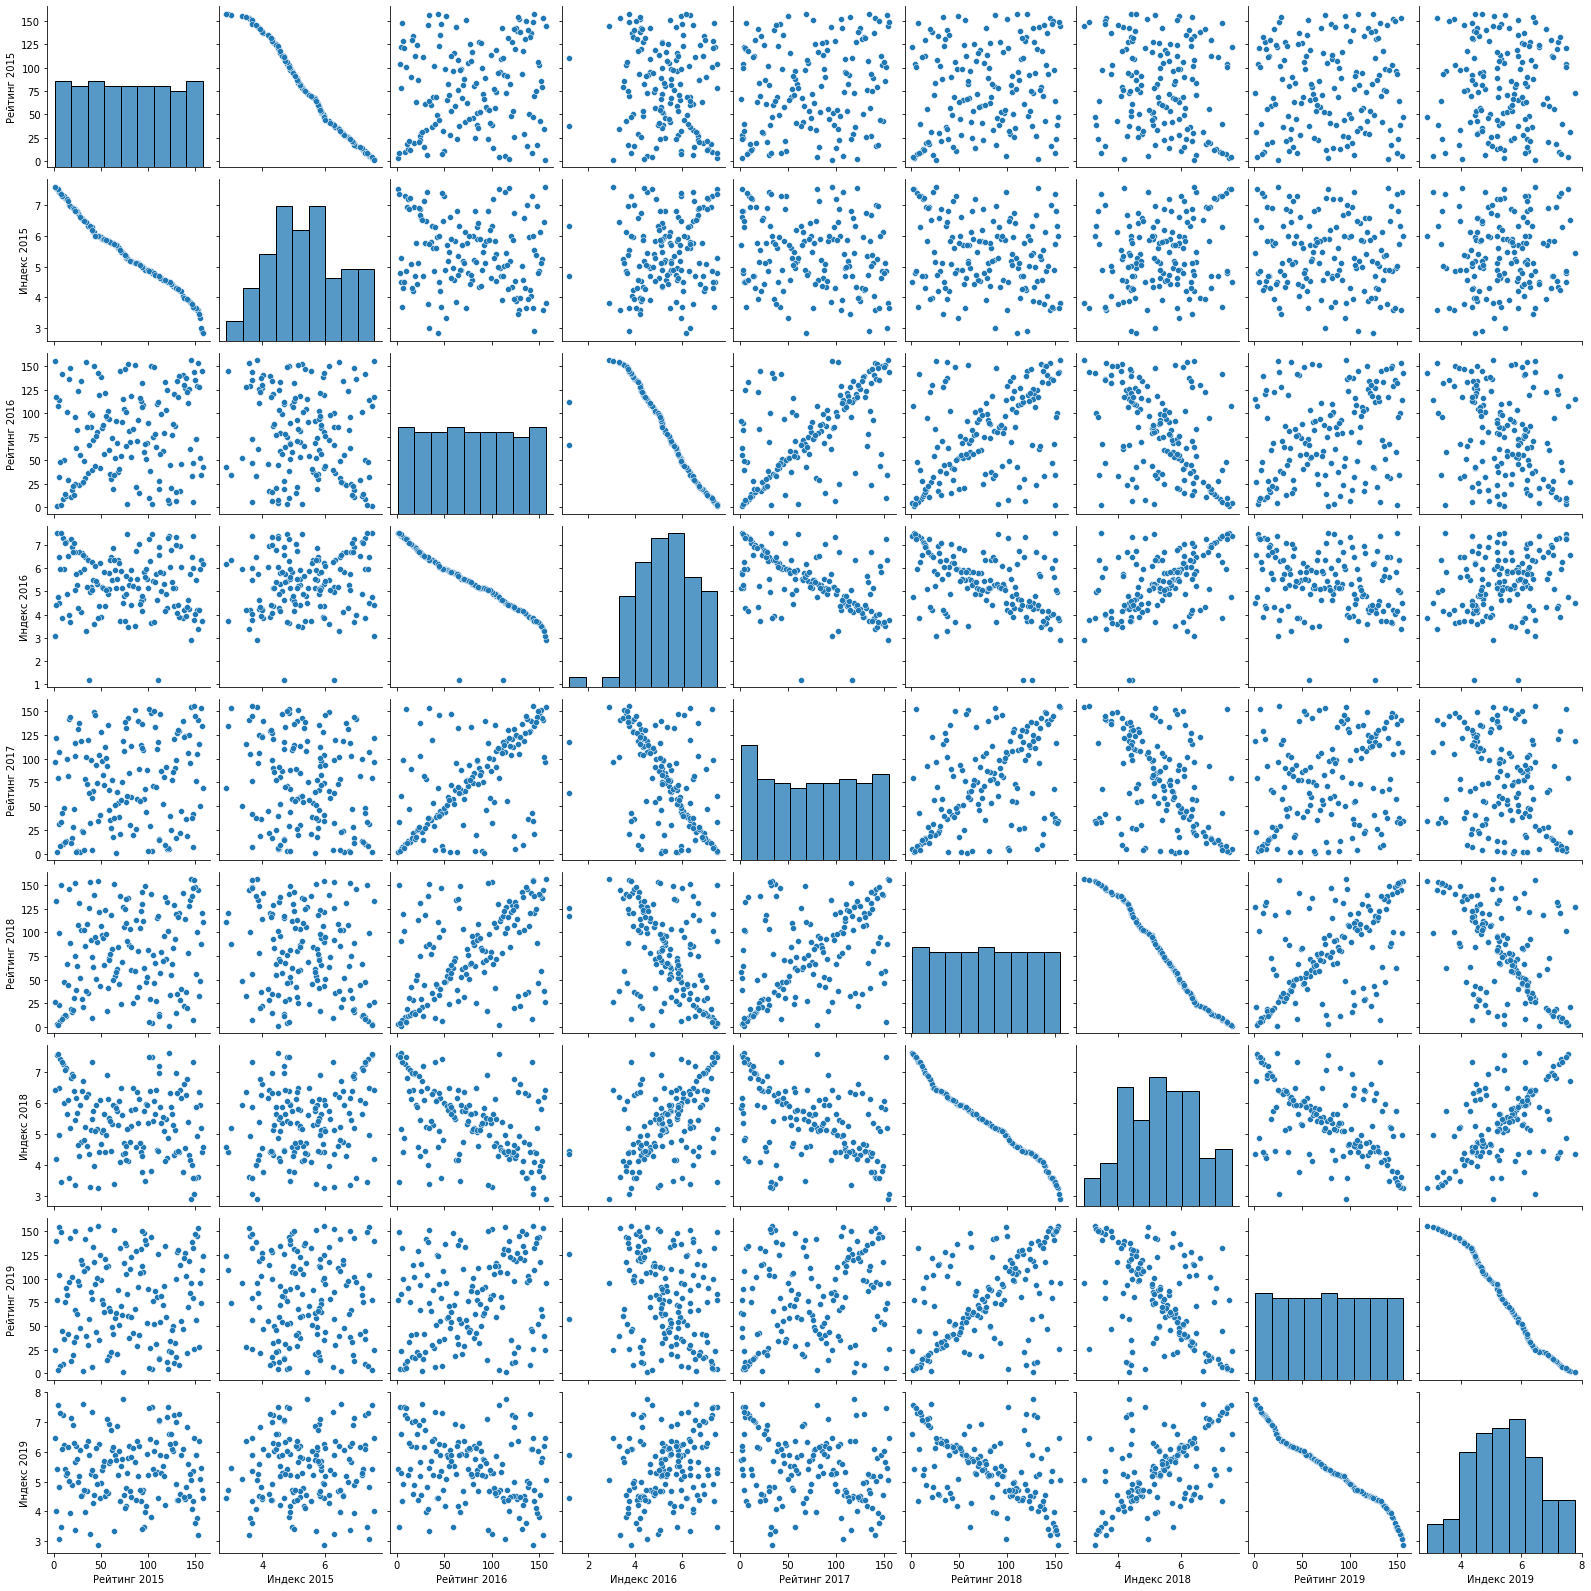

In [ ]:
sns.pairplot(ds)

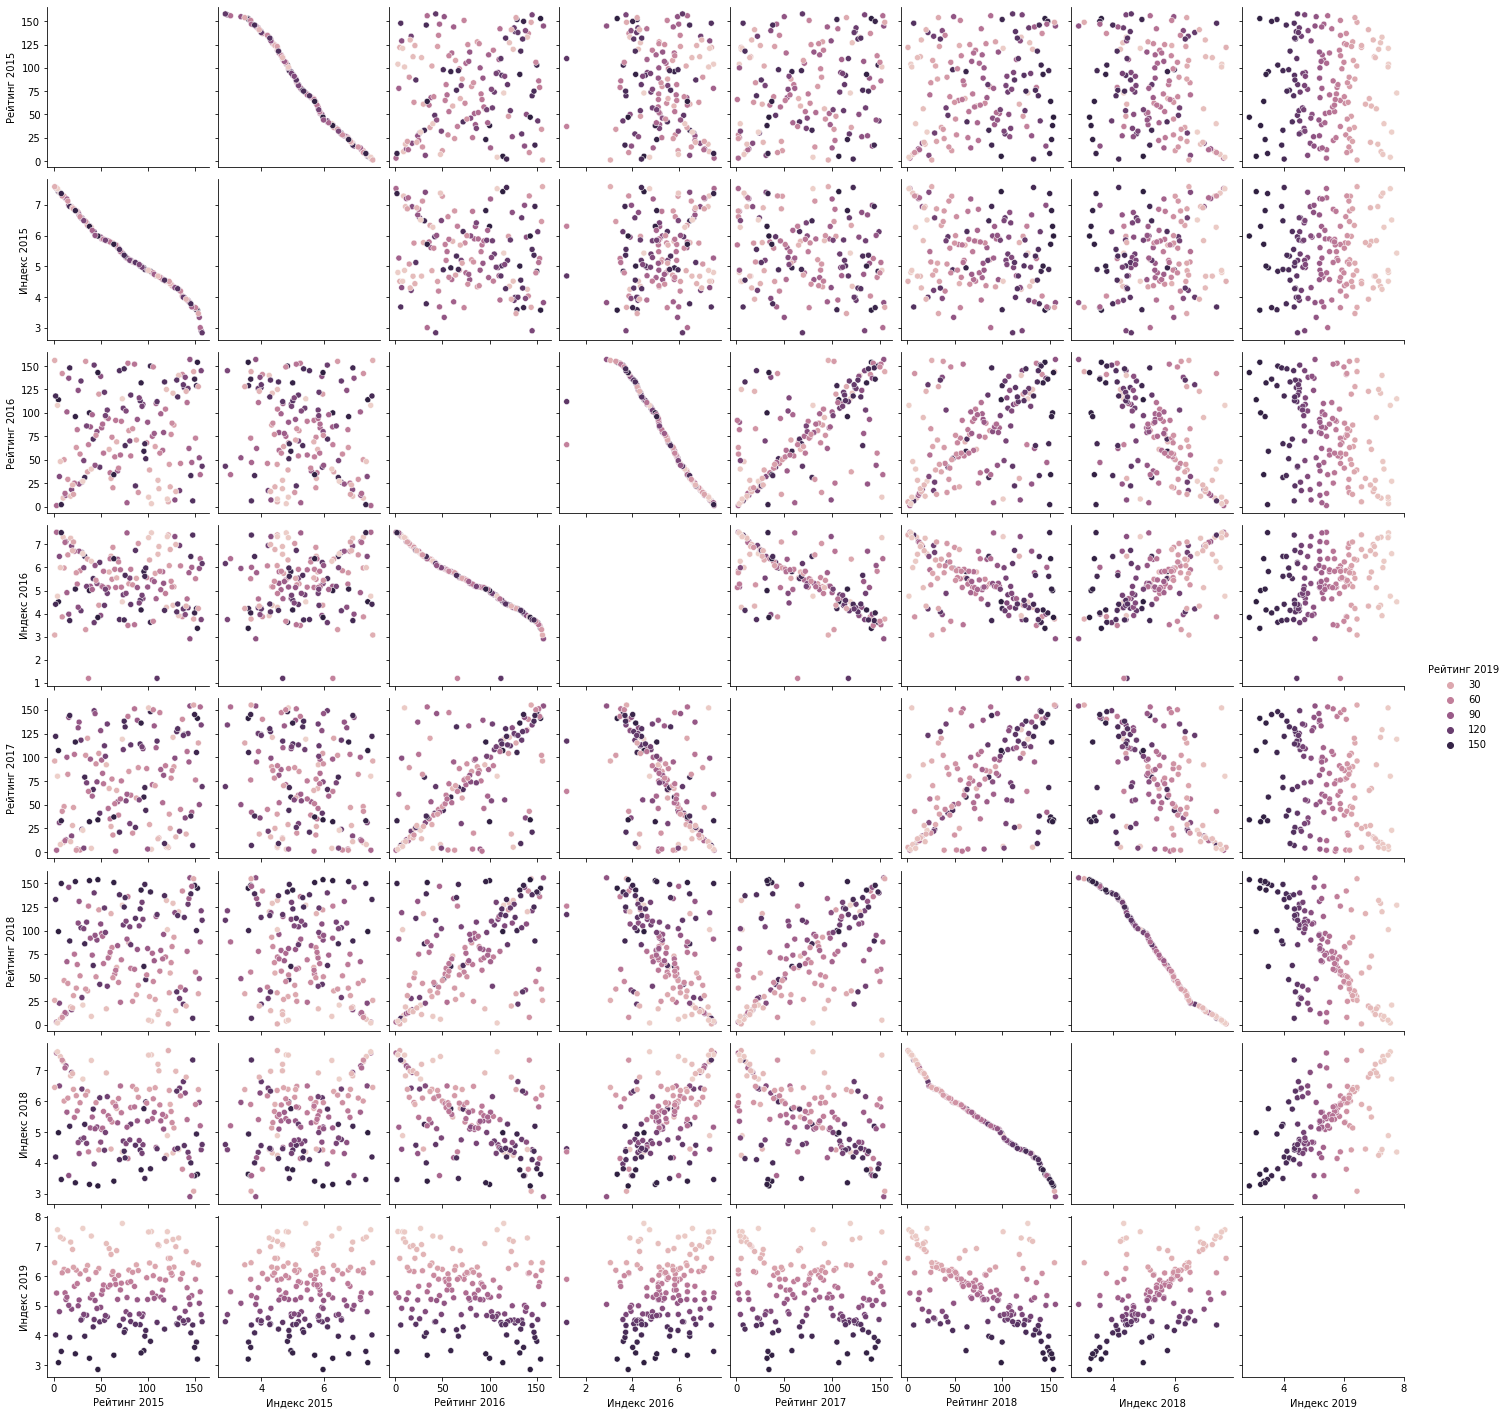

In [ ]:
sns.pairplot(ds, hue="Рейтинг 2019")

# **Ящик с усами**

Нужен для отображения одномерное распределение вероятности.



<AxesSubplot:xlabel='Индекс 2019'>

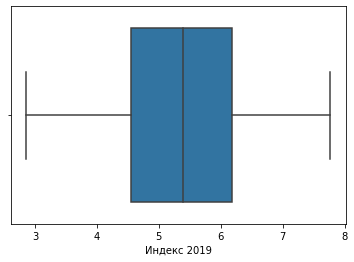

In [ ]:
sns.boxplot(x=ds['Индекс 2019'])

<AxesSubplot:ylabel='Индекс 2019'>

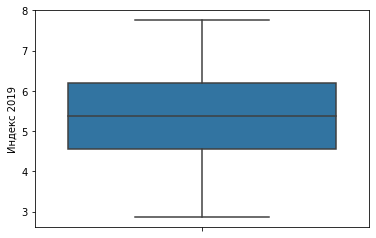

In [ ]:
sns.boxplot(y=ds['Индекс 2019'])

<AxesSubplot:xlabel='Индекс 2019', ylabel='Рейтинг 2019'>

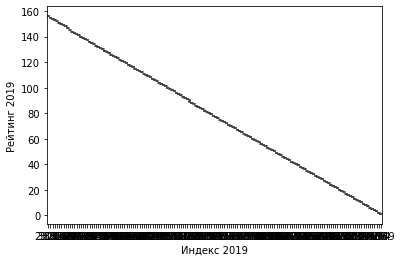

In [ ]:
sns.boxplot(x='Индекс 2019', y='Рейтинг 2019', data=ds)

# **Violin Plot**

Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности.

<AxesSubplot:xlabel='Индекс 2019'>

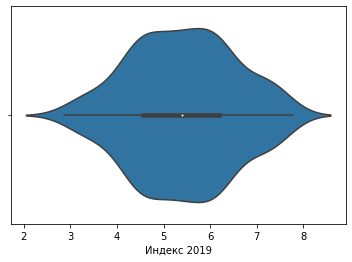

In [ ]:
sns.violinplot(x=ds['Индекс 2019'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Индекс 2016', ylabel='Density'>

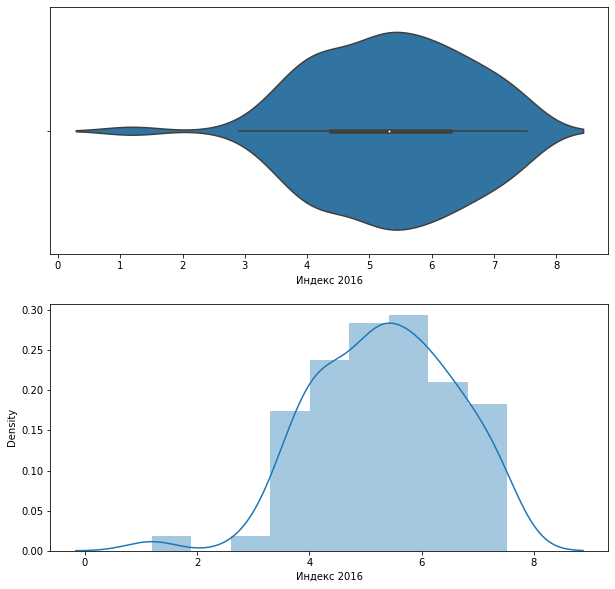

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=ds['Индекс 2016'])
sns.distplot(ds['Индекс 2016'], ax=ax[1])

Из приведенных графиков видно, что Violin Plot действительно показывает распределение плотности.

<AxesSubplot:xlabel='Индекс 2018', ylabel='Индекс 2019'>

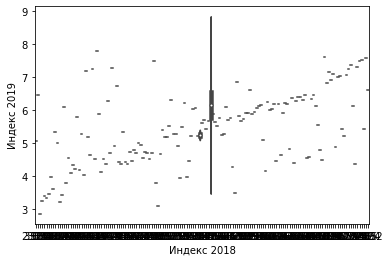

In [ ]:
sns.violinplot(x='Индекс 2018', y='Индекс 2019', data=ds)

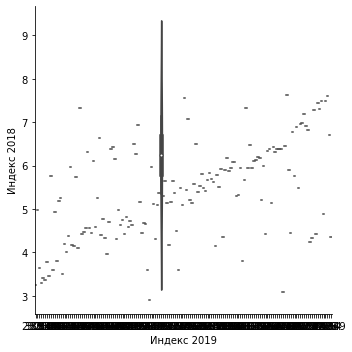

In [ ]:
sns.catplot(y='Индекс 2018', x='Индекс 2019', data=ds, kind="violin", split=True)

# **Информация о корреляции признаков**

Проверка корреляции признаков позволяет решить две задачи:

- Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
- Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак

Корреляция Пирсона:

In [ ]:
ds.corr()

,Рейтинг 2015,Индекс 2015,Рейтинг 2016,Индекс 2016,Рейтинг 2017,Рейтинг 2018,Индекс 2018,Рейтинг 2019,Индекс 2019
Рейтинг 2015,1.00,-0.99,0.16,-0.14,0.19,0.18,-0.19,0.03,-0.02
Индекс 2015,-0.99,1.00,-0.17,0.15,-0.21,-0.21,0.22,-0.06,0.05
Рейтинг 2016,0.16,-0.17,1.00,-0.93,0.59,0.46,-0.47,0.27,-0.28
Индекс 2016,-0.14,0.15,-0.93,1.00,-0.56,-0.47,0.47,-0.25,0.26
Рейтинг 2017,0.19,-0.21,0.59,-0.56,1.00,0.45,-0.45,0.25,-0.25
Рейтинг 2018,0.18,-0.21,0.46,-0.47,0.45,1.00,-0.99,0.53,-0.54
Индекс 2018,-0.19,0.22,-0.47,0.47,-0.45,-0.99,1.00,-0.54,0.55
Рейтинг 2019,0.03,-0.06,0.27,-0.25,0.25,0.53,-0.54,1.00,-0.99
Индекс 2019,-0.02,0.05,-0.28,0.26,-0.25,-0.54,0.55,-0.99,1.00


Корреляция Кендалла:

In [ ]:
ds.corr(method='kendall')

,Рейтинг 2015,Индекс 2015,Рейтинг 2016,Индекс 2016,Рейтинг 2017,Рейтинг 2018,Индекс 2018,Рейтинг 2019,Индекс 2019
Рейтинг 2015,1.00,-1.00,0.12,-0.11,0.13,0.13,-0.13,0.03,-0.03
Индекс 2015,-1.00,1.00,-0.12,0.11,-0.13,-0.13,0.13,-0.03,0.03
Рейтинг 2016,0.12,-0.12,1.00,-0.98,0.48,0.36,-0.36,0.20,-0.20
Индекс 2016,-0.11,0.11,-0.98,1.00,-0.47,-0.37,0.37,-0.20,0.20
Рейтинг 2017,0.13,-0.13,0.48,-0.47,1.00,0.36,-0.36,0.18,-0.18
Рейтинг 2018,0.13,-0.13,0.36,-0.37,0.36,1.00,-1.00,0.43,-0.43
Индекс 2018,-0.13,0.13,-0.36,0.37,-0.36,-1.00,1.00,-0.43,0.43
Рейтинг 2019,0.03,-0.03,0.20,-0.20,0.18,0.43,-0.43,1.00,-1.00
Индекс 2019,-0.03,0.03,-0.20,0.20,-0.18,-0.43,0.43,-1.00,1.00


Корреляция Спирмана:

In [ ]:
ds.corr(method='spearman')

,Рейтинг 2015,Индекс 2015,Рейтинг 2016,Индекс 2016,Рейтинг 2017,Рейтинг 2018,Индекс 2018,Рейтинг 2019,Индекс 2019
Рейтинг 2015,1.00,-1.00,0.16,-0.15,0.19,0.18,-0.18,0.03,-0.03
Индекс 2015,-1.00,1.00,-0.16,0.15,-0.19,-0.18,0.18,-0.03,0.03
Рейтинг 2016,0.16,-0.16,1.00,-0.98,0.59,0.46,-0.46,0.27,-0.27
Индекс 2016,-0.15,0.15,-0.98,1.00,-0.58,-0.47,0.47,-0.27,0.27
Рейтинг 2017,0.19,-0.19,0.59,-0.58,1.00,0.45,-0.45,0.26,-0.26
Рейтинг 2018,0.18,-0.18,0.46,-0.47,0.45,1.00,-1.00,0.53,-0.53
Индекс 2018,-0.18,0.18,-0.46,0.47,-0.45,-1.00,1.00,-0.53,0.53
Рейтинг 2019,0.03,-0.03,0.27,-0.27,0.26,0.53,-0.53,1.00,-1.00
Индекс 2019,-0.03,0.03,-0.27,0.27,-0.26,-0.53,0.53,-1.00,1.00


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

<AxesSubplot:>

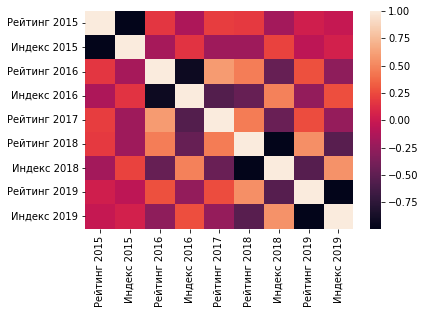

In [ ]:
sns.heatmap(ds.corr())

<AxesSubplot:>

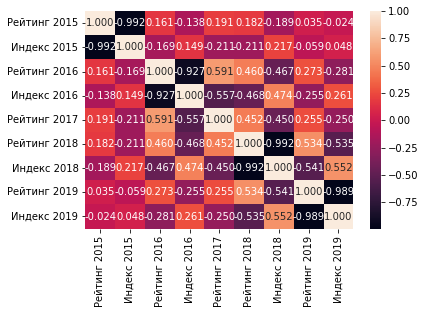

In [ ]:
sns.heatmap(ds.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

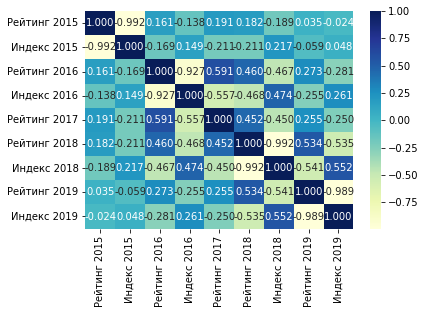

In [ ]:
sns.heatmap(ds.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<ipython-input-31-987f2f5a9e9d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(ds.corr(), dtype=np.bool)


<AxesSubplot:>

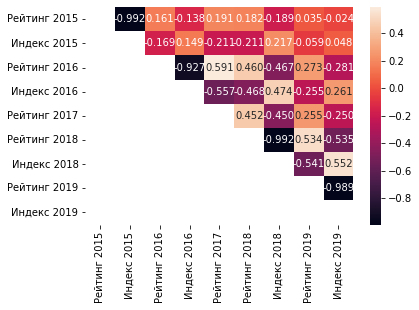

In [ ]:
mask = np.zeros_like(ds.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True (оставить нижнюю часть)
mask[np.tril_indices_from(mask)] = True     # оставить верхнюю часть
sns.heatmap(ds.corr(), mask=mask, annot=True, fmt='.3f')

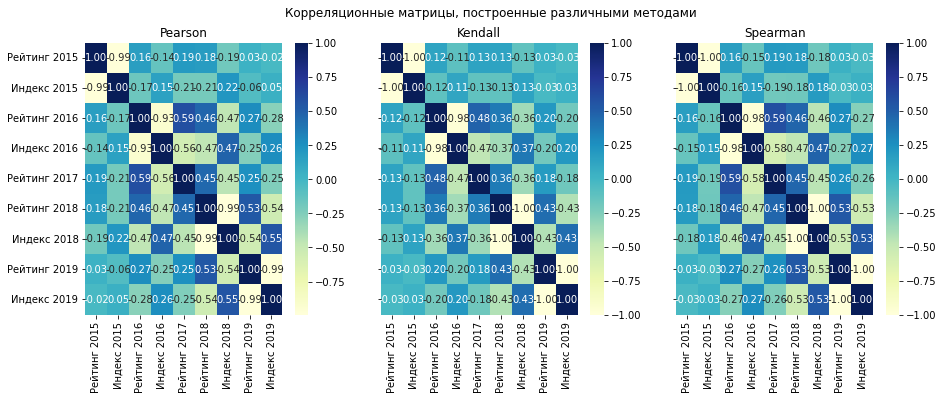

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(ds.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f', cmap='YlGnBu')
sns.heatmap(ds.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f', cmap='YlGnBu')
sns.heatmap(ds.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f', cmap='YlGnBu')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

HeatMap с указанием размера

<AxesSubplot:>

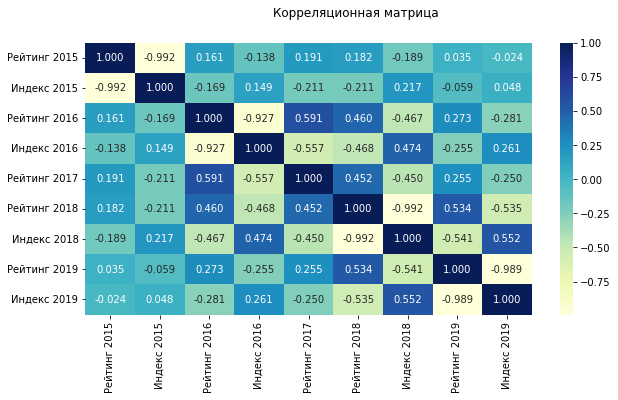

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(ds.corr(), ax=ax, annot=True, fmt='.3f', cmap='YlGnBu')